# Demonstration of Constant Power Factor Function for BESS DER

This example demonstrates steady state performance of constant power factor function for BESS DER

In [1]:
from opender import DER_BESS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create OpenDER BESS object, with 1MVA, 1MW, 1Mvar symmetrical rating
der_obj = DER_BESS(NP_P_MAX=1e6,
                   NP_VA_MAX=1e6,
                   NP_P_MAX_CHARGE=1e6,
                   NP_APPARENT_POWER_CHARGE_MAX=1e6,
                   NP_Q_MAX_INJ=1e6,
                   NP_Q_MAX_ABS=1e6)

In [3]:
# Enable constant power factor mode, and set power factor to 0.9 absorption
der_obj.der_file.CONST_PF_MODE_ENABLE = True
der_obj.der_file.CONST_PF = 0.9
der_obj.der_file.CONST_PF_EXCITATION = 'ABS'

In [4]:
# Set voltage to 1pu and available DC power to 1pu
der_obj.update_der_input(v_pu=1, f=60, p_dem_pu = 1)

In [5]:
# Execute DER object to generate output. DER should output 0.9pu active power and -0.44pu reactive power.
der_obj.run()

(900000.0000000001, -435889.89435406734)

In [6]:
# Prepare arrays for plotting
p_plot = []
q_plot = []

In [7]:
# Obtain DER output P and Q for both charging and discharging conditions
for p in np.arange(-1, 1.1, 0.2):
    der_obj.update_der_input(p_dem_pu=p)

    # calculate output power each time step
    P, Q = der_obj.run()

    # save result
    p_plot.append(der_obj.p_out_kw)
    q_plot.append(der_obj.q_out_kvar)


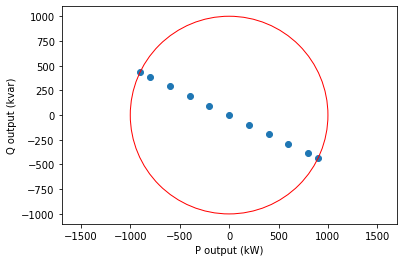

In [8]:
# plot figure
fig = plt.figure()
plt.scatter(p_plot, q_plot)
plt.xlabel('P output (kW)')
plt.ylabel('Q output (kvar)')
plt.gca().add_patch(plt.Circle((0,0),radius=1e3,color='r',fill=False))
plt.axis('equal')
plt.show()

Notice that when apparent power is reached, the DER reduces active power to maintain the constant power factor setting, in both charging and discharging modes